In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from Engineer import transform

C:\Users\Ut Luom\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Ut Luom\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Yimeng-Zhang/feature-engineering-and-feature-selection/master/data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Survived']]
df.head()

,Pclass,Sex,Age,Fare,SibSp,Survived
0,3,male,22.0,7.2500,1,0
1,1,female,38.0,71.2833,1,1
2,3,female,26.0,7.9250,0,1
3,1,female,35.0,53.1000,1,1
4,3,male,35.0,8.0500,0,0


In [5]:
df.shape

(891, 6)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df.Survived, test_size=0.3, random_state=42)

VariableFareQ-Q plot


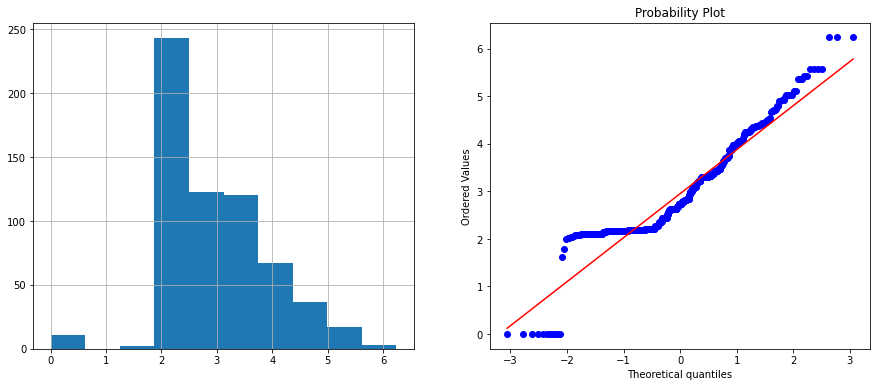

In [9]:
# Logarithmic Transformation
X_train_copy = X_train.copy(deep=True)
X_train_copy = transform.log_transform(data=X_train_copy, cols=['Fare'])

In [10]:
X_train_copy.head()

,Pclass,Sex,Age,Fare,SibSp,Fare_log
445,1,male,4.0,81.8583,0,4.417132
650,3,male,NaN,7.8958,0,2.185579
172,3,female,1.0,11.1333,1,2.495954
450,2,male,36.0,27.7500,1,3.358638
314,2,male,43.0,26.2500,1,3.305054


VariableFareQ-Q plot


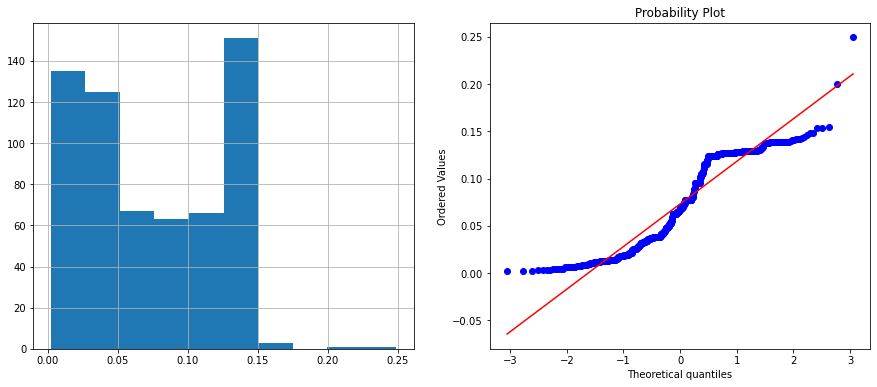

     Pclass     Sex   Age     Fare  SibSp  Fare_reciprocal
445       1    male   4.0  81.8583      0         0.012216
650       3    male   NaN   7.8958      0         0.126650
172       3  female   1.0  11.1333      1         0.089821
450       2    male  36.0  27.7500      1         0.036036
314       2    male  43.0  26.2500      1         0.038095


In [11]:
# Reciprocal Transform
X_train_copy = X_train.copy(deep=True)
X_train_copy = X_train_copy[X_train_copy.Fare != 0] # x should not be 0
X_train_copy = transform.reciprocal_transform(data=X_train_copy, cols=['Fare'])
print(X_train_copy.head())

VariableFare Q-Q plot


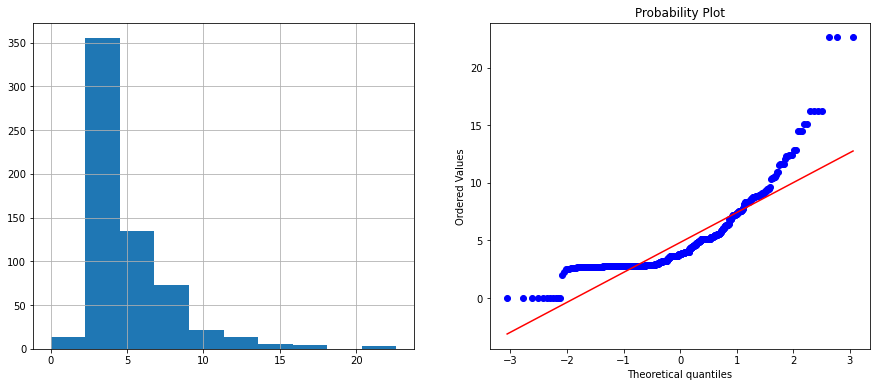

     Pclass     Sex   Age     Fare  SibSp  Fare_square_root
445       1    male   4.0  81.8583      0          9.047558
650       3    male   NaN   7.8958      0          2.809947
172       3  female   1.0  11.1333      1          3.336660
450       2    male  36.0  27.7500      1          5.267827
314       2    male  43.0  26.2500      1          5.123475


In [12]:
# Square root Transformation
X_train_copy = X_train.copy(deep=True)
X_train_copy = transform.square_root_transform(data=X_train_copy, cols=['Fare'])
print(X_train_copy.head())

In [13]:
# Exponential transform
X_train_copy = X_train.copy(deep=True)
X_train_copy = transform.exp_transform(data=X_train_copy, coef=0.2, cols=['Fare'])
print(X_train_copy.head())

AttributeError: module 'Engineer.transform' has no attribute 'exp_transform'